# Q-Learning

Q-Learning algorithms(QLA) are Reinforment learning algorithms which are a little different than the popular policy-based algorithms.

In this noteboook I wil be discussion the thoery along with a simple q-learning problem.

#### TO-DO
- Start with basic theory and discuss founding papers
- Make an end to ed application.
- Make a web interface to display Q-learning algorithm
- Start with lookup-tales and go to Deep Network implementations.

Found [this](https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0) amazing article series on medium by [Arthur](https://medium.com/@awjuliani). I have chosen it to be an entry point into learnin QLA and starting this notebook.

### PART-0
##### Getting an Intuition

Unlike policy gradient methods, which attempt to learn functions which directly map an observation to an action, Q-Learning attempts to learn the value of being in a given state, and taking a specific action there.

In it’s simplest implementation, Q-Learning is a table of values for every state (row) and action (column) possible in the environment. Within each cell of the table, we learn a value for how good it is to take a given action within a given state.

The lookup table would look someting like this:

| State |  A1   |  A2  |  A3  |  A4  |
|-------|-------|------|------|------|
|  S1   |  0.0  | 0.0  |  0.7 |  1.0 |
|  S2   |  0.5  | 0.5  |  0.5 |  0.3 |
|  ::   |   ::  |  ::  |   :: |   :: |
|  Sn   |  0.1  | 0.0  |  0.7 |  0.0 |

- Sn  : Represents the state of the environment in which the agent lies.
- A1-4: Represent the set of actions the agent can perform.
- The values 0.0-1.0 of the table represent the rewad the agent has recorded for each (state, action) pair.
- This lookup table is a construct the agent maintains within itself to interact with the world; just like we register stuff in our memory to make better interactions with the world in subsequent epochs.

##### Updating the q-table
We make updates to our Q-table using something called the [Bellman equation](https://en.wikipedia.org/wiki/Bellman_equation). The equation is widely used in Dynamic Programming to break dynamic optimizatio problems into sequence of simpler subproblems. In lay man terms the equation states that: 

**\[expected long-term reward\]** for a given action is equal to the 
**\[immediate reward from the current action\]** combined with the **\[expected reward from the best future action taken at the following state\]**.

In this way, we reuse our own Q-table when estimating how to update our table for future actions! In equation form, the rule looks like this:

## The Environment

The book by legendary Dr. Bellman:
`BELLMAN, Richard, and Robert Kalaba. Dynamic Programming and Modern Control Theory. Academic Press, 1965` gives very insightful detail on the mathematical framework on which the entire theory of Reinforcement Learning was built. Interestingly, Dr Bellman proposed the framework and used Dynamic Programming to play around with it, my goal here is to start with DP and crawl my way up to Deep RL. Most of his work seems to be inspired by control theory mostly for two reasons:
1. The framework is bilt up in such a manner that it resembles the framework of modern control theory
2. He refers to a ton of theories from his books on Control theory.

Enough of history lesson, lets get to work..

### Setting up the environment

Using [OpenAI's gym](https://gym.openai.com/) environment, we are gonna start with the popular 'CartPole-v0'

In [3]:
import gym
import numpy as np

env = gym.make('Taxi-v2').unwrapped
state = env.reset()

In [4]:
print(state)
env.render()

147
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [6]:
n_states = env.observation_space.n
n_actions = env.action_space.n

## Exploring Random policy

In [14]:
state = env.reset()
counter = 0
g = 0
reward = None
while reward != 20:
  state, reward, done, info = env.step(env.action_space.sample())
  counter += 1
  g += reward
print("Total accumulated reward:{}\n In {} steps".format(g, counter))

Total accumulated reward:-11150
 In 2837 steps


Q-table Learning:

In [15]:
episodes = 1

In [16]:
Q = np.zeros([n_states, n_actions])
Q.shape

(500, 6)

In [17]:
Q_hist = np.zeros([n_states, n_actions, 0])
Q_hist.shape

(500, 6, 0)

In [18]:
alpha = 0.618
G = 0

In [35]:
for episode in range(1, episodes+1):
  done = False
  G, reward = 0,0
  state = env.reset()
  firstState = state
  print("Initial State = {}".format(firstState))
  while reward != 20:
    action = np.argmax(Q[state])
    state2, reward, done, info = env.step(action)
    Q[state, action] += alpha * (reward + np.max(Q[state2]) - Q[state, action])
    G += reward
    state = state2

    Q_hist = np.dstack((Q_hist, Q))
finalState = state
print('Final State = {}'.format(finalState))

Initial State = 312
Final State = 16


In [36]:
print(firstState)
Q_hist[firstState,:,0]

312


array([0., 0., 0., 0., 0., 0.])

In [37]:
Q_hist.shape

(500, 6, 2754)

In [38]:
numSteps = Q_hist.shape[2]-1
print(finalState)
Q_hist[finalState,:,numSteps]

16


array([-0.618, -0.618, -0.618, -0.618, -6.18 , 12.36 ])

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


TypeError: Image data cannot be converted to float

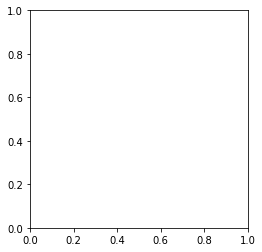

In [43]:
env.render()